# Compare USDM & SPI
a. stein 4.18.2022

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr
import rioxarray
import rasterio as rio
import pandas as pd
import geopandas as gpd

from tqdm.autonotebook import tqdm

import sys
sys.path.append('../../')
import sedi.wrangle as wrangle

Populating the interactive namespace from numpy and matplotlib


/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/ipykernel_launcher.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  if sys.path[0] == '':


Load in USDM and SPI

In [3]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'

# USDM will be already clipped, but we'll need to clip spi real quick
usdm = xr.open_dataset(f'{dm_path}/usdm/USDM_WA_20000104_20220412.nc')
spi_1y = xr.open_dataset(f'{dm_path}/spi/spi1y.nc')

In [8]:
usdm_da_wa = usdm['USDM'].rio.write_crs('EPSG:4326', inplace=True)
spi_da = spi_1y['spi'].rio.write_crs('EPSG:4326', inplace=True)

Grab some bounds for Washington and check the crs

In [5]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)
wa_gdf = states_gdf[(states_gdf.NAME=='Washington')]

In [6]:
wa_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Clip SPI to WA

In [7]:
spi_da_wa = wrangle.clip_xarray(spi_da, wa_gdf)

In [9]:
spi_da_wa

<xarray.DataArray 'spi' (day: 3066, lat: 84, lon: 188)>
array([[[        nan,         nan,         nan, ..., -0.6199999 ,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.6199999 ,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -1.28      ,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -0.71000004,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.9000001 ,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -1.28      ,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -0.32000017,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.38999987,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.38999987,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon      (lon) float64 -124.7 -124.7 -124.6 -124.6 ... -117.0 -117.0 -116.9
  * day      (day) datetime64[ns] 1980-01-05 1980-01-10 ... 2021-12-31
    crs      int64 0
Attributes:
    units:              
    description:        Standardized Precipitation Index
    long_name:          spi1y
    standard_name:      spi1y
    dimensions:         lon lat time
    grid_mapping:       crs
    coordinate_system:  WGS84,EPSG:4326

In [10]:
usdm_da_wa

<xarray.DataArray 'USDM' (date: 1163, lat: 139, lon: 314)>
[50760298 values with dtype=float64]
Coordinates:
  * lat          (lat) float64 49.0 48.97 48.95 48.92 ... 45.62 45.6 45.57 45.55
  * lon          (lon) float64 -124.7 -124.7 -124.7 ... -117.0 -116.9 -116.9
  * date         (date) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-04-12
    spatial_ref  int64 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -124.74590760646159 0.024999999999999963 0....

## Prelim plots

So I know that USDM is every week (7 days), while SPI is every 5 days.

In [17]:
# this is the first time stamp for UDSM ...
usdm_da_wa_sel = usdm_da_wa.sel(date='2000-01-04')

In [20]:
# and it looks like there is an SPI for the 5th, so that's
# close enough for me
spi_da_wa_sel = spi_da_wa.sel(day='2000-01-05')

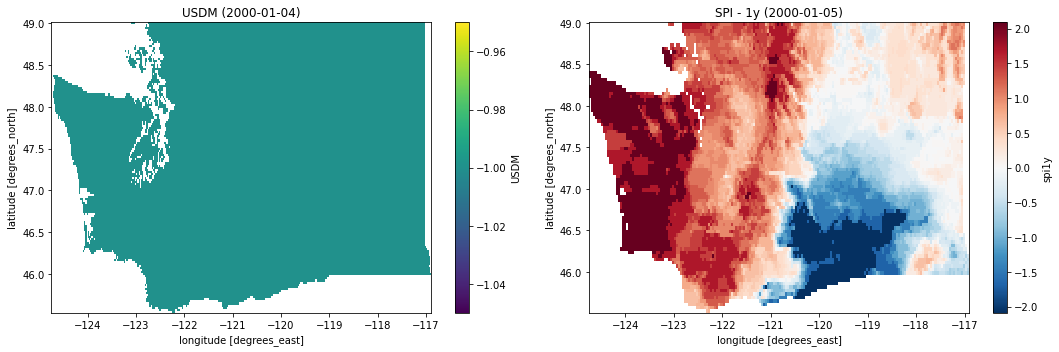

In [31]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

usdm_da_wa_sel.plot(ax=ax[0])
spi_da_wa_sel.plot(ax=ax[1])

ax[0].set_title('USDM (2000-01-04)')
ax[1].set_title('SPI - 1y (2000-01-05)')

plt.tight_layout()

Hm, let's make a function to get the correct USDM colorbar ...

-1 : Neutral (or Wet)    
0 : D0 (Abnormal Dry)    
1 : D1 (Moderate Drought)    
2 : D2 (Severe Drought)    
3 : D3 (Extreme Drought)    
4 : D4 (Exceptional Drought)